<a href="https://colab.research.google.com/github/hussain0048/Machine-Learning-Driven-Approach-for-2019-nCoV-Warning-System/blob/master/Implementation/5_13_2020_Covid_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1- Introduction** 

Predicting confirmed cases of Convid-19 with LSTM

In [1]:
!git clone https://github.com/hussain0048/Machine-Learning-Driven-Approach-for-2019-nCoV-Warning-System

Cloning into 'Machine-Learning-Driven-Approach-for-2019-nCoV-Warning-System'...
fatal: could not read Username for 'https://github.com': No such device or address


# **2- Import Nessary library**

In [3]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

In [4]:
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

In [5]:
pd.plotting.register_matplotlib_converters()

In [6]:
#[3]
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
from fbprophet import Prophet

import logging
logging.getLogger().setLevel(logging.ERROR)

In [8]:
# LSTM
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **3-Import dataset**

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Datasets/Covid-19/data_cases1.csv", usecols=['Date','Confirmed'],index_col='Date', parse_dates=True )
df.head()

In [ ]:
df.head()

In [ ]:
df.shape

#**4-Data cleaning and feature engineering**

In [68]:
df1 = df.reset_index()

In [ ]:
df1.head()

In [70]:
#we get rid of possible duplicates and missing values in the data [3]
df1 = df1[['Date', 'Confirmed']].dropna().drop_duplicates()

In [ ]:
df1.shape

In [72]:
#we need to convert Date to the datetime format because by default pandas treats this field as string-valued[3]
df1['Date'] = pd.to_datetime(df1['Date'])

In [ ]:
df1.head()

In [ ]:
#Let's sort the dataframe by time and take a look at what we've got [3]
df1.sort_values(by=['Date']).head(n=3)

In [ ]:
#We will just trim our time series to keep only those rows that fall onto the period from March 10, 2020 to March 31, 2020[3]
df1 = df1[(df1['Date'] > '2020-03-09') & (df1['Date'] < '2020-04-01')].sort_values(by=['Date'])
df1.head(n=10)

In [77]:
#As we are going to predict the number of confirm Cases of Covid-19, we will aggregate and count unique Cases at each given point in time. We will name the corresponding new column Confirmed_Cases:
aggr_df = df1.groupby('Date')[['Confirmed']].count()
aggr_df.columns = ['Confirmed_Cases']

In [ ]:
aggr_df.head(n=3)


In [ ]:
#In this practice, we are interested in the number of confirmed cases a day. But at this moment all our data is divided into irregular time intervals that are less than a day. 
#This is called a sub-daily time series.To fix this, we need to aggregate the Cases counts by "bins" of a date size. 
#In time series analysis, this process is referred to as resampling. And if we reduce the sampling rate of data it is often called downsampling.
#Luckily, pandas has a built-in functionality for this task. We will resample our time index down to 1-day bins [3]
daily_df = aggr_df.resample('D').apply(sum)
daily_df.head(n=3)

In [ ]:
weekly_df = df1.resample('W').apply(sum)

In [24]:
weekly_df.head()

NameError: ignored

In [25]:
daily_df = daily_df.loc[daily_df.index >= '2020-03-10']
daily_df.head(n=3)

NameError: ignored

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Daily Confirmed Cases of COVID-19 (World)')
plt.plot(daily_df['Confirmed_Cases'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Confirmed Cases', fontsize=18)
plt.show()

#**5- Modelling**


In [79]:
#Lstm
data=aggr_df.filter(['Confirmed'])

In [80]:
dataset=aggr_df.values

In [81]:
training_data_len=math.ceil(len(dataset)*.8)

In [ ]:
training_data_len

In [83]:
scaler=MinMaxScaler(feature_range=(0,1))

In [84]:
scaled_data=scaler.fit_transform(dataset)

In [ ]:
scaled_data

In [86]:
# create the training dataset
# create the scaled training dataset
train_data=scaled_data[0:training_data_len,:]
# split the data into x_train and y_train dataset
x_train = []
y_train = []

for i in range (12, len(train_data)):
  x_train.append(train_data[i-12:i,0])
  y_train.append(train_data[i,0])
  if i<= 12:
    print(x_train)
    print(y_train)
    print()

[array([0.        , 0.04458599, 0.07006369, 0.08280255, 0.12738854,
       0.12101911, 0.15923567, 0.15286624, 0.15923567, 0.17197452,
       0.1910828 , 0.21656051])]
[0.624203821656051]



In [87]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
x_train

array([[0.        , 0.04458599, 0.07006369, 0.08280255, 0.12738854,
        0.12101911, 0.15923567, 0.15286624, 0.15923567, 0.17197452,
        0.1910828 , 0.21656051],
       [0.04458599, 0.07006369, 0.08280255, 0.12738854, 0.12101911,
        0.15923567, 0.15286624, 0.15923567, 0.17197452, 0.1910828 ,
        0.21656051, 0.62420382]])

In [88]:
# Reshap the data
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(2, 12, 1)

In [89]:
# build the LSTM model
model=Sequential()
model.add(LSTM(40, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(40, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [91]:
# train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

2/2 [==============================] - 0s 6ms/step - loss: 0.4434


In [90]:
# compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [92]:
test_data=scaled_data[training_data_len -12:,:]
x_test= []
y_test = dataset[training_data_len:,:]
for i in range(12, len(test_data)):
  x_test.append(test_data[i -12:i,0])

In [93]:
x_test=np.array(x_test)

In [94]:
x_test

array([[0.07006369, 0.08280255, 0.12738854, 0.12101911, 0.15923567,
        0.15286624, 0.15923567, 0.17197452, 0.1910828 , 0.21656051,
        0.62420382, 0.72611465],
       [0.08280255, 0.12738854, 0.12101911, 0.15923567, 0.15286624,
        0.15923567, 0.17197452, 0.1910828 , 0.21656051, 0.62420382,
        0.72611465, 0.78343949],
       [0.12738854, 0.12101911, 0.15923567, 0.15286624, 0.15923567,
        0.17197452, 0.1910828 , 0.21656051, 0.62420382, 0.72611465,
        0.78343949, 0.89808917]])

In [95]:
x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

In [96]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [97]:
rmse=np.sqrt(np.mean(predictions - y_test)**2)

In [98]:
rmse

130.11727078755698

In [100]:
train=aggr_df[:training_data_len]
valid=aggr_df[training_data_len:]

In [101]:
valid['Predictions']=predictions

In [102]:
valid.head()

,Confirmed_Cases,Predictions
Date,,
2020-03-24,140,26.088554
2020-03-25,158,27.168270
2020-03-26,174,28.391363


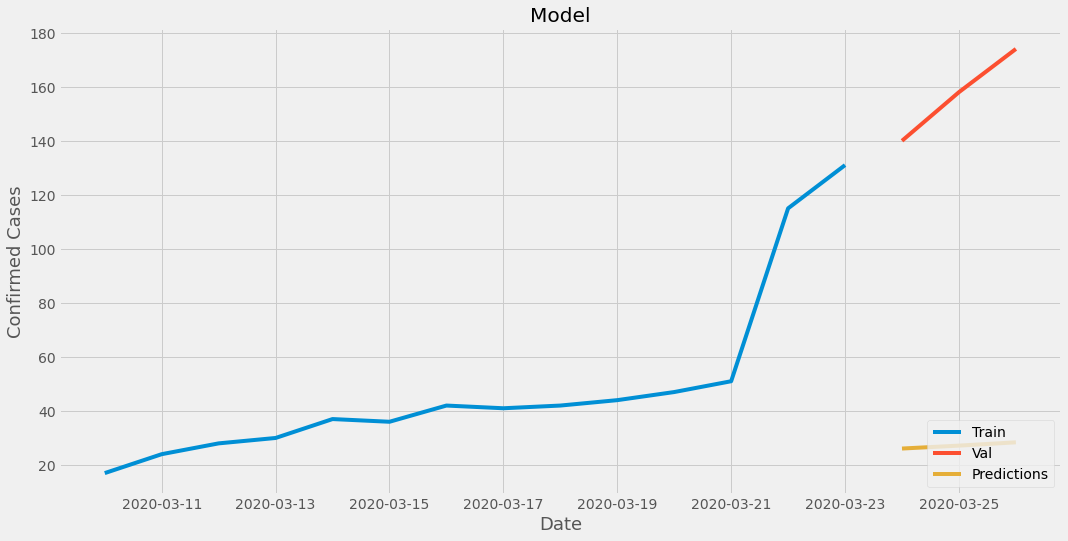

In [103]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Confirmed Cases',fontsize=18)
plt.plot(train['Confirmed_Cases'])
plt.plot(valid[['Confirmed_Cases','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')

# **References**

[1]Forecasting Time Series Data With Prophet I & II
https://nextjournal.com/eric-brown/forecasting-with-prophet

[2]Forecasting Time Series Data With Prophet IV
https://nextjournal.com/eric-brown/forecasting-with-prophet-part-4

[3]Time series analysis in Python
https://mlcourse.ai/articles/topic9-part2-prophet/

[4] https://www.kaggle.com/kashnitsky/topic-9-part-2-time-series-with-facebook-prophet

[5] How To Predict Coronavirus (COVID-19) Cases Using Deep Learning in Python
https://laconicml.com/predict-coronavirus-cases-deep-learning/